# process data

In [1]:
author_and_place_list = []
with open('author_and_place_list.txt') as f:
    content = f.read().splitlines()
    for line in content:
        author_and_place_list.append(line)
print(len(author_and_place_list))
print(author_and_place_list[0])

FileNotFoundError: [Errno 2] No such file or directory: 'author_and_place_list.txt'

In [0]:
all_place = []
for author_and_place in author_and_place_list:
    group = author_and_place.strip().split("\u00B7")
    
    flag = False
    for individual in group:
        try:
            author, place = individual.split('(')
            author = author.lower().strip()
            place = place.lower().split(')')[0].strip()
            all_place.append(place)
        except:
            flag = True
            pass
    if flag:
        print(author_and_place)
        print()

In [0]:
from collections import Counter
import numpy as np
name, count = np.unique(all_place, return_counts=True)

print(name[499])

new york university shanghai


In [0]:
lines1 = open('duong_v3.txt').readlines()
lines2 = open('khiem.txt').readlines()
lines = lines1 + lines2
place_dict = {}
for someplace, place in zip(name, lines):
    place_dict[someplace] = place.strip().split(' + ')
print(len(lines), len(name))
print(len(place_dict))

processed_author_and_place_list = []
outlier_idx = []
for idx, author_and_place in enumerate(author_and_place_list):
    group = author_and_place.strip().split("\u00B7")
    author_group = []
    for individual in group:
        try:
            author, place = individual.split('(')
            author = author.strip()
            place = place.lower().split(')')[0].strip()
            assert place in place_dict
            author_group.append([author, place_dict[place]])
        except:
            outlier_idx.append(idx)
            pass
    processed_author_and_place_list.append(author_group)
print(len(processed_author_and_place_list))
len(outlier_idx)

960 960
960
1088


35

In [0]:
for idx in outlier_idx:
  print(processed_author_and_place_list[idx])

In [0]:
processed_author_and_place_list[29].append(['Damien Scieur', ['samsung']])
processed_author_and_place_list[34].insert(0, ['Huan Xiong', ['mohamed bin zayed university of artificial intelligence']])
processed_author_and_place_list[51].insert(0, ['Damien Scieur', ['samsung']])
processed_author_and_place_list[52].append(['Shan-Hung (Brandon) Wu ', ['national tsing hua university']])
processed_author_and_place_list[65].insert(0, ['Aadirupa Saha', ['indian institute of science']])
processed_author_and_place_list[66].insert(0, ['Aadirupa Saha', ['indian institute of science']])
processed_author_and_place_list[192].append(['Adish Singla', ['max planck institute for software systems']])
processed_author_and_place_list[251].insert(2, ['Damien Scieur', ['samsung']])
processed_author_and_place_list[255].insert(0, ['Marie-Liesse Cauwet', ['universite paris-est, ligm (umr 8049), cnrs, esiee paris']])
processed_author_and_place_list[333].extend([['Johannes Fischer', ['karlsruhe institute of technology']],
                                             ['Ömer Sahin Tas', ['karlsruhe institute of technology']]])
processed_author_and_place_list[401].extend([['Jongseok Lee', ['german aerospace center']],
                                             ['Matthias Humt', ['german aerospace center']],
                                             ['Jianxiang Feng', ['german aerospace center']],
                                             ['Rudolph Triebel', ['german aerospace center']]])
processed_author_and_place_list[457].insert(1, ['Harry (Huazhe) Xu', ['uc berkeley']])
processed_author_and_place_list[474].insert(0, ['Konstantin Mishchenko', ['kaust']])
processed_author_and_place_list[486].extend([['Saadullah Amin', ['german research center for aritificial intelligence']],
                                             ['Stalin Varanasi', ['german research center for aritificial intelligence']],
                                             ['Katherine Ann Dunfield', ['german research center for aritificial intelligence']],
                                             ['Günter Neumann', ['german research center for aritificial intelligence']]])
processed_author_and_place_list[510].insert(0, ['Joao Monteiro', ['institut national de la recherche scientifique']])
processed_author_and_place_list[510].insert(2, ['Jahangir  Alam', ['computer research institute of montreal']])
processed_author_and_place_list[589].insert(1, ['Yi Xu', ['alibaba']])
processed_author_and_place_list[590].append(['Xinhua Zhang', ['university of illinois at chicago']])
processed_author_and_place_list[696].insert(1, ['Viacheslav Borovitskiy', ['PDMI RAS']])
processed_author_and_place_list[790].insert(2, ['Adish Singla', ['max planck institute for software systems']])
processed_author_and_place_list[791].insert(1, ['Oleh Rybkin', ['university of pennsylvania', 'uc berkeley']])
processed_author_and_place_list[879].append(['Hinrich Schuetze', ['university of munich']])
processed_author_and_place_list[891].append(['Hinrich Schuetze', ['university of munich']])
processed_author_and_place_list[915].insert(0, ['Mike Dusenberry', ['google brain']])
processed_author_and_place_list[1000].insert(1, ['Henry (Hank) Hoffmann', ['the university of chicago']])
processed_author_and_place_list[1084].insert(3, ['Rex (Zhitao) Ying', ['stanford university']])
processed_author_and_place_list[1087].insert(0, ['Sung Whan Yoon', ['ulsan national institute of science and technology']])
processed_author_and_place_list[1087].insert(1, ['Jun Seo', ['kaist']])

In [0]:
x = ['microsoft']
'\n'.join(x)

'microsoft'

In [0]:
content = []
for _author_and_place_list in processed_author_and_place_list:
  paper = []
  for author, places in _author_and_place_list:
    text = author + '[' + ' | '.join(places) + ']'
    paper.append(text)
  content.append(' + '.join(paper))
len(content)

1088

In [0]:
with open('cleaned_affilation.txt', 'w') as f:
  f.write('\n'.join(content))

# author stats

In [0]:
with open('cleaned_affilation.txt') as f:
  papers = f.read().splitlines()
len(papers)

1088

In [0]:
from collections import Counter
author_count = Counter()
affi_count = Counter()
for paper in papers:
  authors = paper.strip().split(' + ')
  for author in authors:
    _author = author.replace('[', ' (')
    _author = _author.replace(']', ')')
    author_count[_author] += 1
len(author_count)

3460

In [0]:
del author_count['University of California Moritz Hardt (uc berkeley)']
author_count['Moritz Hardt(uc berkeley)'] = 4

In [0]:
author_count['Pieter Abbeel (uc berkeley | covariant)'] += author_count['Pieter Abbeel (uc berkeley)']
del author_count['Pieter Abbeel (uc berkeley)']
author_count['Dale Schuurmans (google | university of alberta)'] += author_count['Dale Schuurmans (university of alberta)']
del author_count['Dale Schuurmans (university of alberta)']
len(author_count)

3458

In [0]:
u_name = {}
for x in author_count:
  n = (x.split('(')[0]).strip()
  if n not in u_name:
    u_name[n] = set()
  u_name[n].add(x)
for n in u_name:
  if len(u_name[n]) > 1:
    print(u_name[n])

{'Ayush Jain (uc san diego)', 'Ayush Jain (university of southern california)'}
{'Krzysztof Choromanski (google brain)', 'Krzysztof Choromanski (google)'}
{'Chao Chen (stevens institute of technology)', 'Chao Chen (tsinghua university)'}
{'Yunhe Wang (huawei)', 'Yunhe Wang (peking university)'}
{'Liu Liu (uc santa barbara)', 'Liu Liu (the university of sydney)'}
{'Matthew Hoffman (deepmind)', 'Matthew Hoffman (google)'}
{'Zhao Song (baidu)', 'Zhao Song (institute for advanced study)', 'Zhao Song (university of texas at austin | university of washington)'}
{'Yaodong Yang (huawei)', 'Yaodong Yang (tianjin university)'}
{'Jun Wang (alibaba)', 'Jun Wang (university college london)'}
{'Miao Xu (the university of queensland | riken)', 'Miao Xu (alibaba)'}
{'Yuan Zhou (university of illinois at urbana-champaign)', 'Yuan Zhou (university of oxford)'}
{'Yu Cheng (microsoft)', 'Yu Cheng (university of illinois at chicago)'}
{'Han Zhang (google)', 'Han Zhang (virginia commonwealth university)'}
{

In [0]:
author_count_list = [[x, author_count[x]] for x in author_count]
len(author_count_list)

3458

In [0]:
sorted_author_list = sorted(author_count_list, key=lambda e: (-e[1], e[0]))

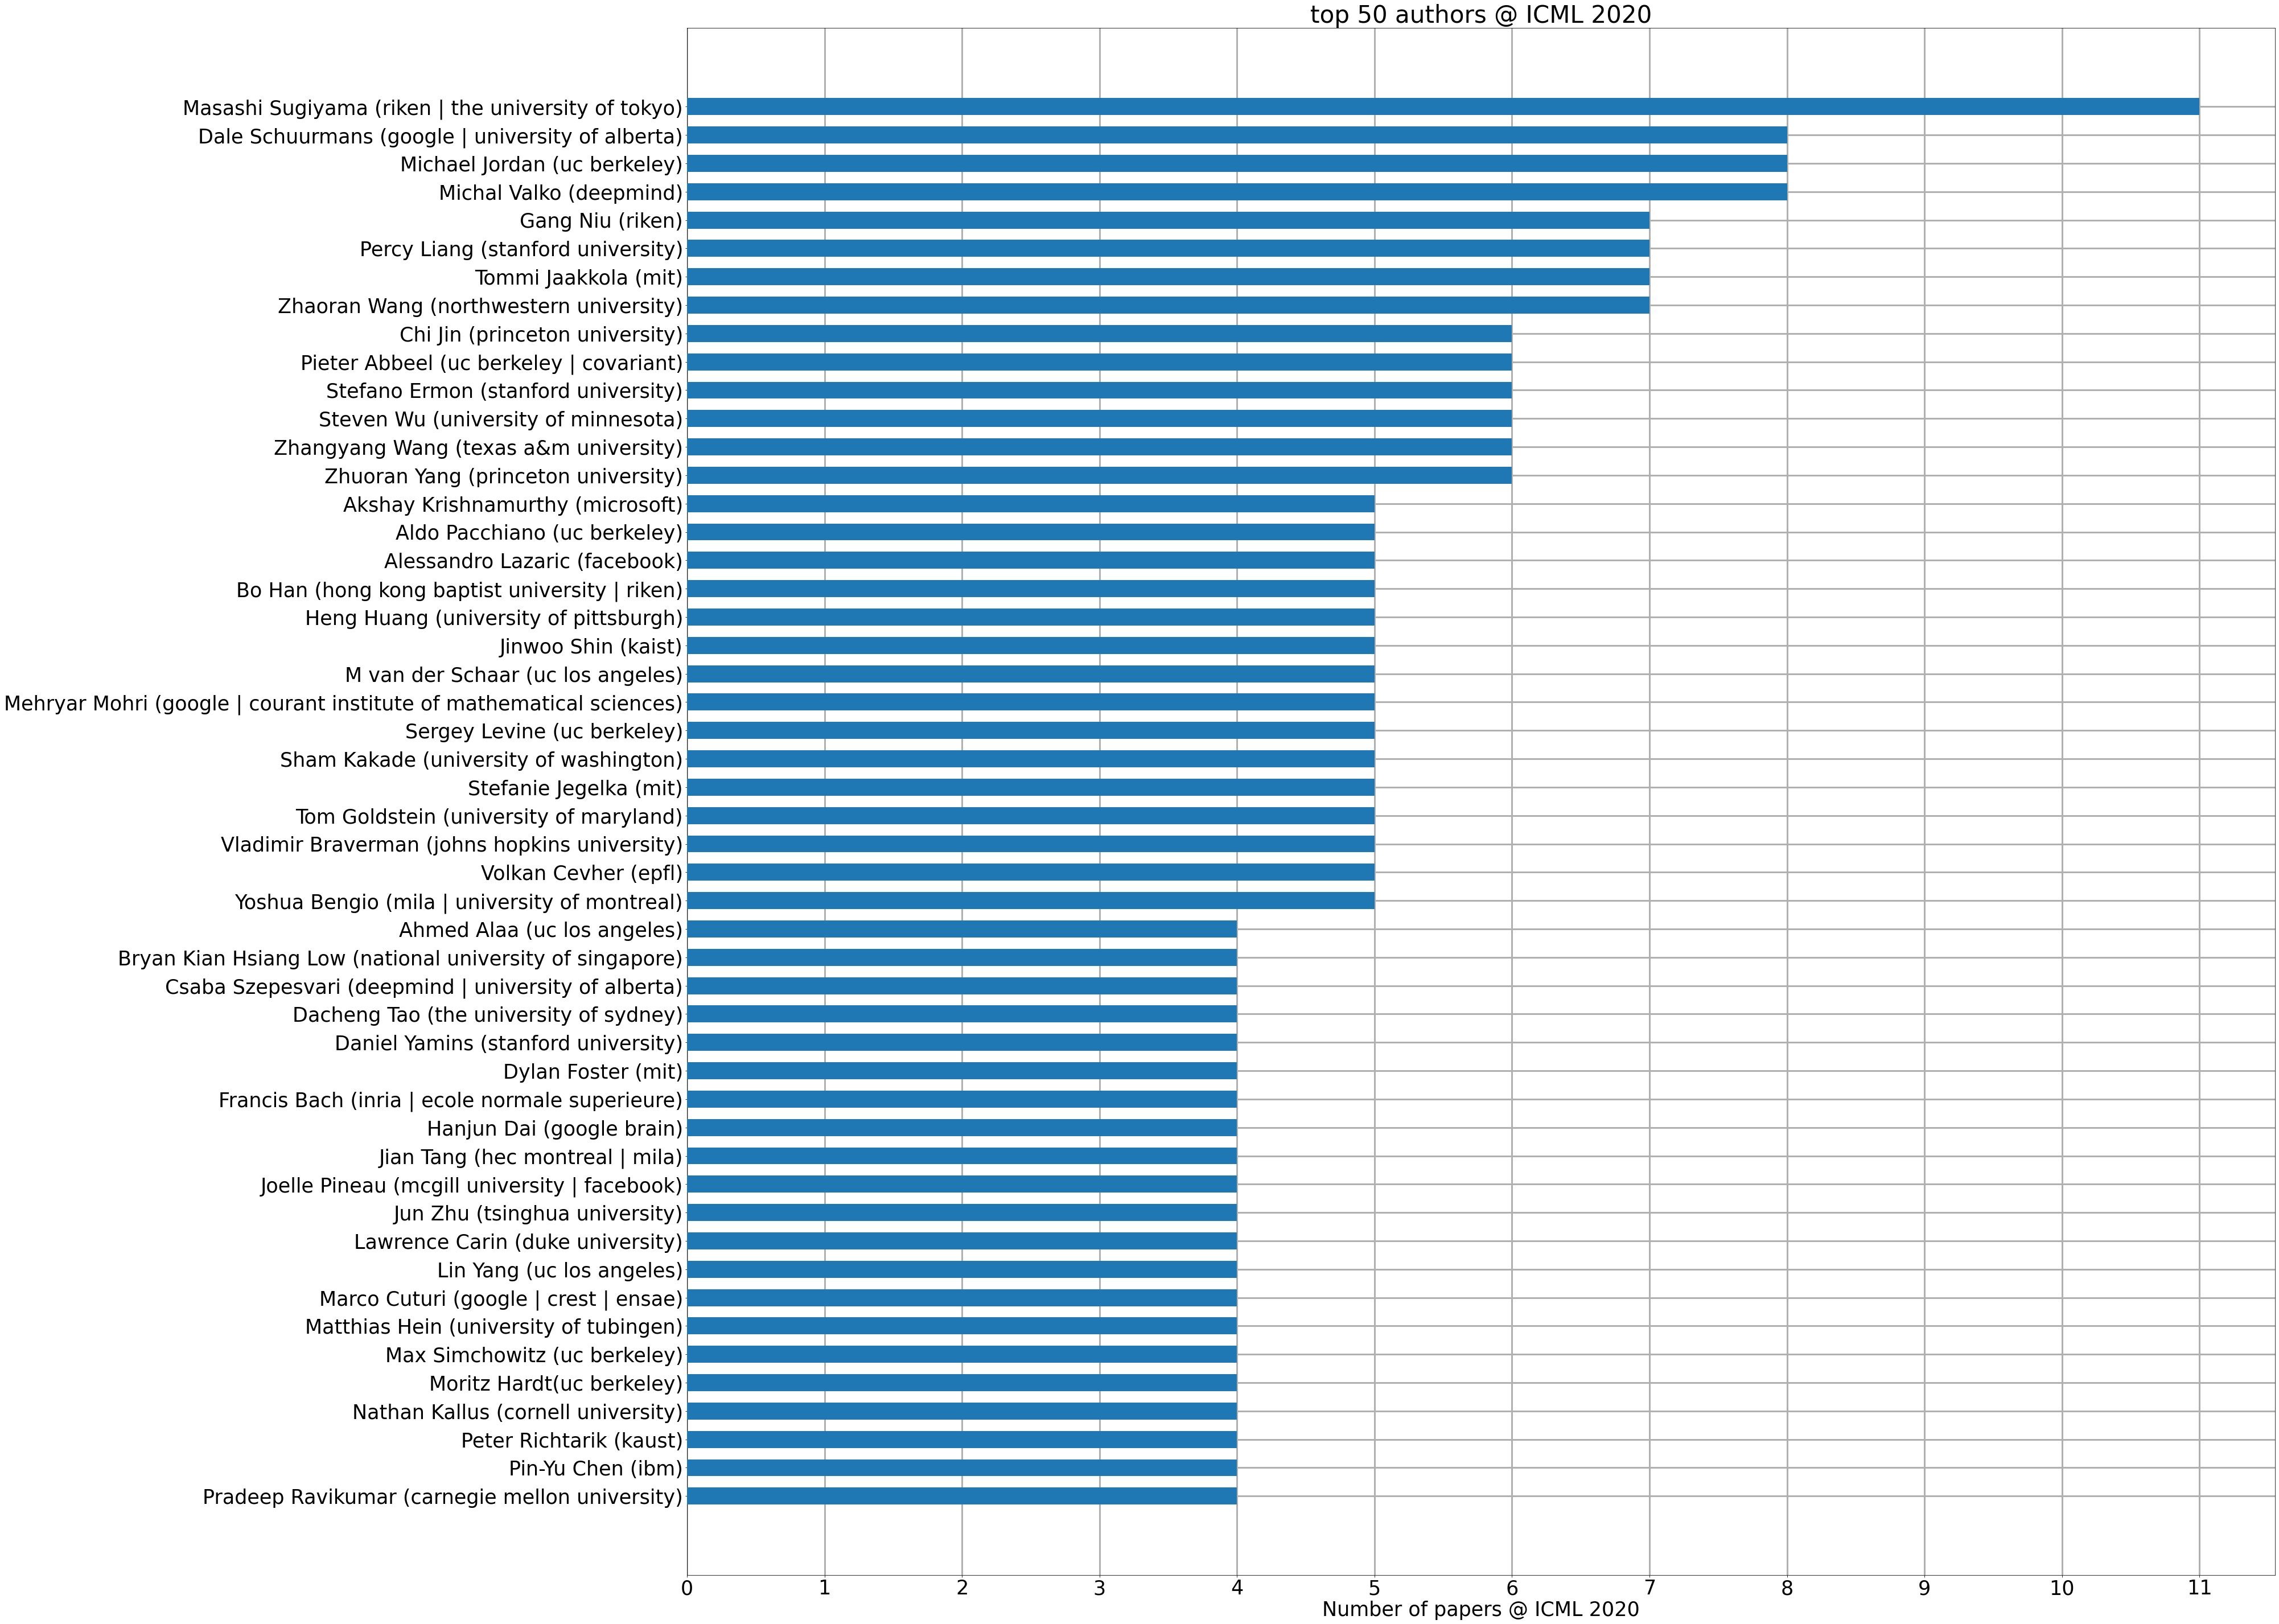

In [0]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 35})
fig, ax = plt.subplots()
fig.set_size_inches(50, 50)
top = 50
most_common = sorted_author_list[:top]
top_authors = [obj[0] for obj in most_common]
paper_counts = [obj[1] for obj in most_common]
x = ax.barh(np.arange(0, 250, 5), paper_counts, height=3., align='center', zorder=3)

ax.set_yticks(np.arange(0, 250, 5))
ax.set_yticklabels(top_authors)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xticks(list(range(0, 12)))
ax.set_xlabel('Number of papers @ ICML 2020')
ax.set_title(f'top {top} authors @ ICML 2020')

ax.grid(linewidth=3)
fig.savefig('icml_stats_authortop50.png', bbox_inches='tight')
plt.show()